# Assignment-11-Text Mining-01-Elon Musk


1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [3]:
# load the dataset
tweets=pd.read_csv('Elon_musk.csv', encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Text Preprocessing

In [4]:
tweets=[Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [5]:
# Joining the list into one string/text
tweets_text=''.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [6]:
# remove Twitter username handles from a given twitter text.(Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', '@ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', '@gtera27', 'Doge', 'is', 'underestimated', '@teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM@OwenSparks_', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', ':/', '/', 't.co/3rWE9uHSTS@geoffkeighley', 'It', '\x92', 's', 'getting', 'realBo

In [7]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2ojFrodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM@OwenSparks_ Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely @GiveDirectly Just sent someJust agree to do Clubhouse with :/ / t.co/3rWE9uHSTS@geoffkeighley It \x92 s getting realBought some Dogecoin for lil X , so he can be a toddler hodler @JoshManMode He definitely has issues , but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O@freewalletorg Any crypto w

In [8]:
# Remove Punctuations 
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2ojFrodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrMOwenSparks Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley It \x92 s getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet that won \x92 t give you your private keys should be

In [9]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley It \x92 s getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs freewalletorg Your app sucksRT  NASA has selected Falcon Hea

In [10]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocationThe', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', 'tco3rWE9uHSTSgeoffkeighley', 'It', '\x92', 's', 'getting', 'realBought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'has', 'issues', 'but',

In [16]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Tokens count
len(text_tokens)

18275

In [13]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)


['alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'tco3rWE9uHSTSgeoffkeighley', 'It', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'Your', 'app', 'sucksRT', 'NASA', 'sel

In [19]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'blkmdl3', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'rationaletienne', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'cryptoshrikar', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missingback', 'work', 'go', 'capybarasurfer', 'does', 'seem', 'bit', 'high', 'itsallrisky', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit', 'time', 'whereas', 'wow']


In [20]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'blkmdl3', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'rationaletienn', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'cryptoshrikar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'missingback', 'work', 'go', 'capybarasurf', 'doe', 'seem', 'bit', 'high', 'itsallriski', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', 'wow']


In [21]:
# Lemmatization
nlp = spacy.load("en_core_web_sm")
doc=nlp(' '.join(lower_words))
print(doc)

alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocationthe entertaining outcome likely givedirectly just sent somejust agree clubhouse tco3rwe9uhstsgeoffkeighley it getting realbought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy this true power any crypto wallet give private keys avoided costs freewalletorg your app sucksrt nasa selected falcon heavy launch first two elements lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lo

In [22]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'somejust', 'agree', 'clubhouse', 'tco3rwe9uhstsgeoffkeighley', 'it', 'get', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'freewalletorg', 'your', 'app', 'sucksrt', 'nasa', 'select', 'falcon', 'heavy'

In [23]:
clean_tweets=' '.join(lemmas)
clean_tweets

'alien idaacarmack ray trace cyberpunk hdr nextlevel have try great interview gtera27 doge underestimate teslacn congratulations tesla china amazing execution last year now next even happy new year ox underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocationthe entertaining outcome likely givedirectly just send somejust agree clubhouse tco3rwe9uhstsgeoffkeighley it get realbought dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy this true power any crypto wallet give private key avoid cost freewalletorg your app sucksrt nasa select falcon heavy launch first two element lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequ

## Feature Extaction

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [25]:
print(cv.vocabulary_)

{'alien': 219, 'idaacarmack': 1646, 'ray': 2691, 'trace': 3500, 'cyberpunk': 864, 'hdr': 1541, 'nextlevel': 2262, 'have': 1535, 'try': 3539, 'great': 1471, 'interview': 1756, 'gtera27': 1487, 'doge': 1009, 'underestimate': 3674, 'teslacn': 3367, 'congratulations': 768, 'tesla': 3365, 'china': 666, 'amazing': 241, 'execution': 1199, 'last': 1887, 'year': 3922, 'now': 2297, 'next': 2261, 'even': 1170, 'happy': 1520, 'new': 2259, 'ox': 2414, 'underdoge': 3673, 'all': 221, 'think': 3420, 'would': 3905, 'fail': 1233, 'himself': 1582, 'haha': 1499, 'thank': 3392, 'indeed': 1693, 'tweet': 3554, 'definitely': 914, 'represent': 2767, 'realworld': 2712, 'time': 3447, 'allocationthe': 224, 'entertaining': 1134, 'outcome': 2388, 'likely': 1942, 'givedirectly': 1438, 'just': 1826, 'send': 2934, 'somejust': 3083, 'agree': 196, 'clubhouse': 699, 'tco3rwe9uhstsgeoffkeighley': 3323, 'it': 1777, 'get': 1422, 'realbought': 2704, 'dogecoin': 1012, 'lil': 1946, 'toddler': 3464, 'hodler': 1591, 'joshmanmode

In [26]:
print(cv.get_feature_names()[100:200])

['50000', '50k', '60', '60000', '65', '69420', '6f', '6ki', '727', '74', '78', '7th', '90', '9007', '91demigod', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absolutelyhey', 'absolutelywhat', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleratingrt', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'adamhoov', 'adamkiotz', 'adamklotz', 'add', 'additive', 'address', 'adlanbogatyryov', 'administer', 'adolfomoreno', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago

In [27]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
print(tweetscv.toarray().shape)

(11953, 3957)


## 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [29]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [30]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'erdayastronaut', 'even', 'ever', 'exactly', 'falcon', 'first', 'flcnhvy', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'it', 'land', 'launch', 'like', 'look', 'lot', 'make', 'many', 'maybe', 'mission', 'model', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'ppathole', 'pretty', 'probably', 'production', 'right', 'rocket', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 3. TF-IDF Vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [32]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '2020', '30', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'and', 'appear', 'apply', 'appreciate', 'around', 'article', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'cast', 'catch', 'cell', 'ch4', 'change', 'civilization', 'cleantechnica', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'datum', 'day', 'deep', 'definitely', 'design', 'difference', 'different', 'dmcryan', 'do', 'dock', 'doge', 'dojo', 'dragon', 'drive', 'droneship', 'due', 'early', 'earth', 'easy', 'electric', 'en

## Generate Word Cloud

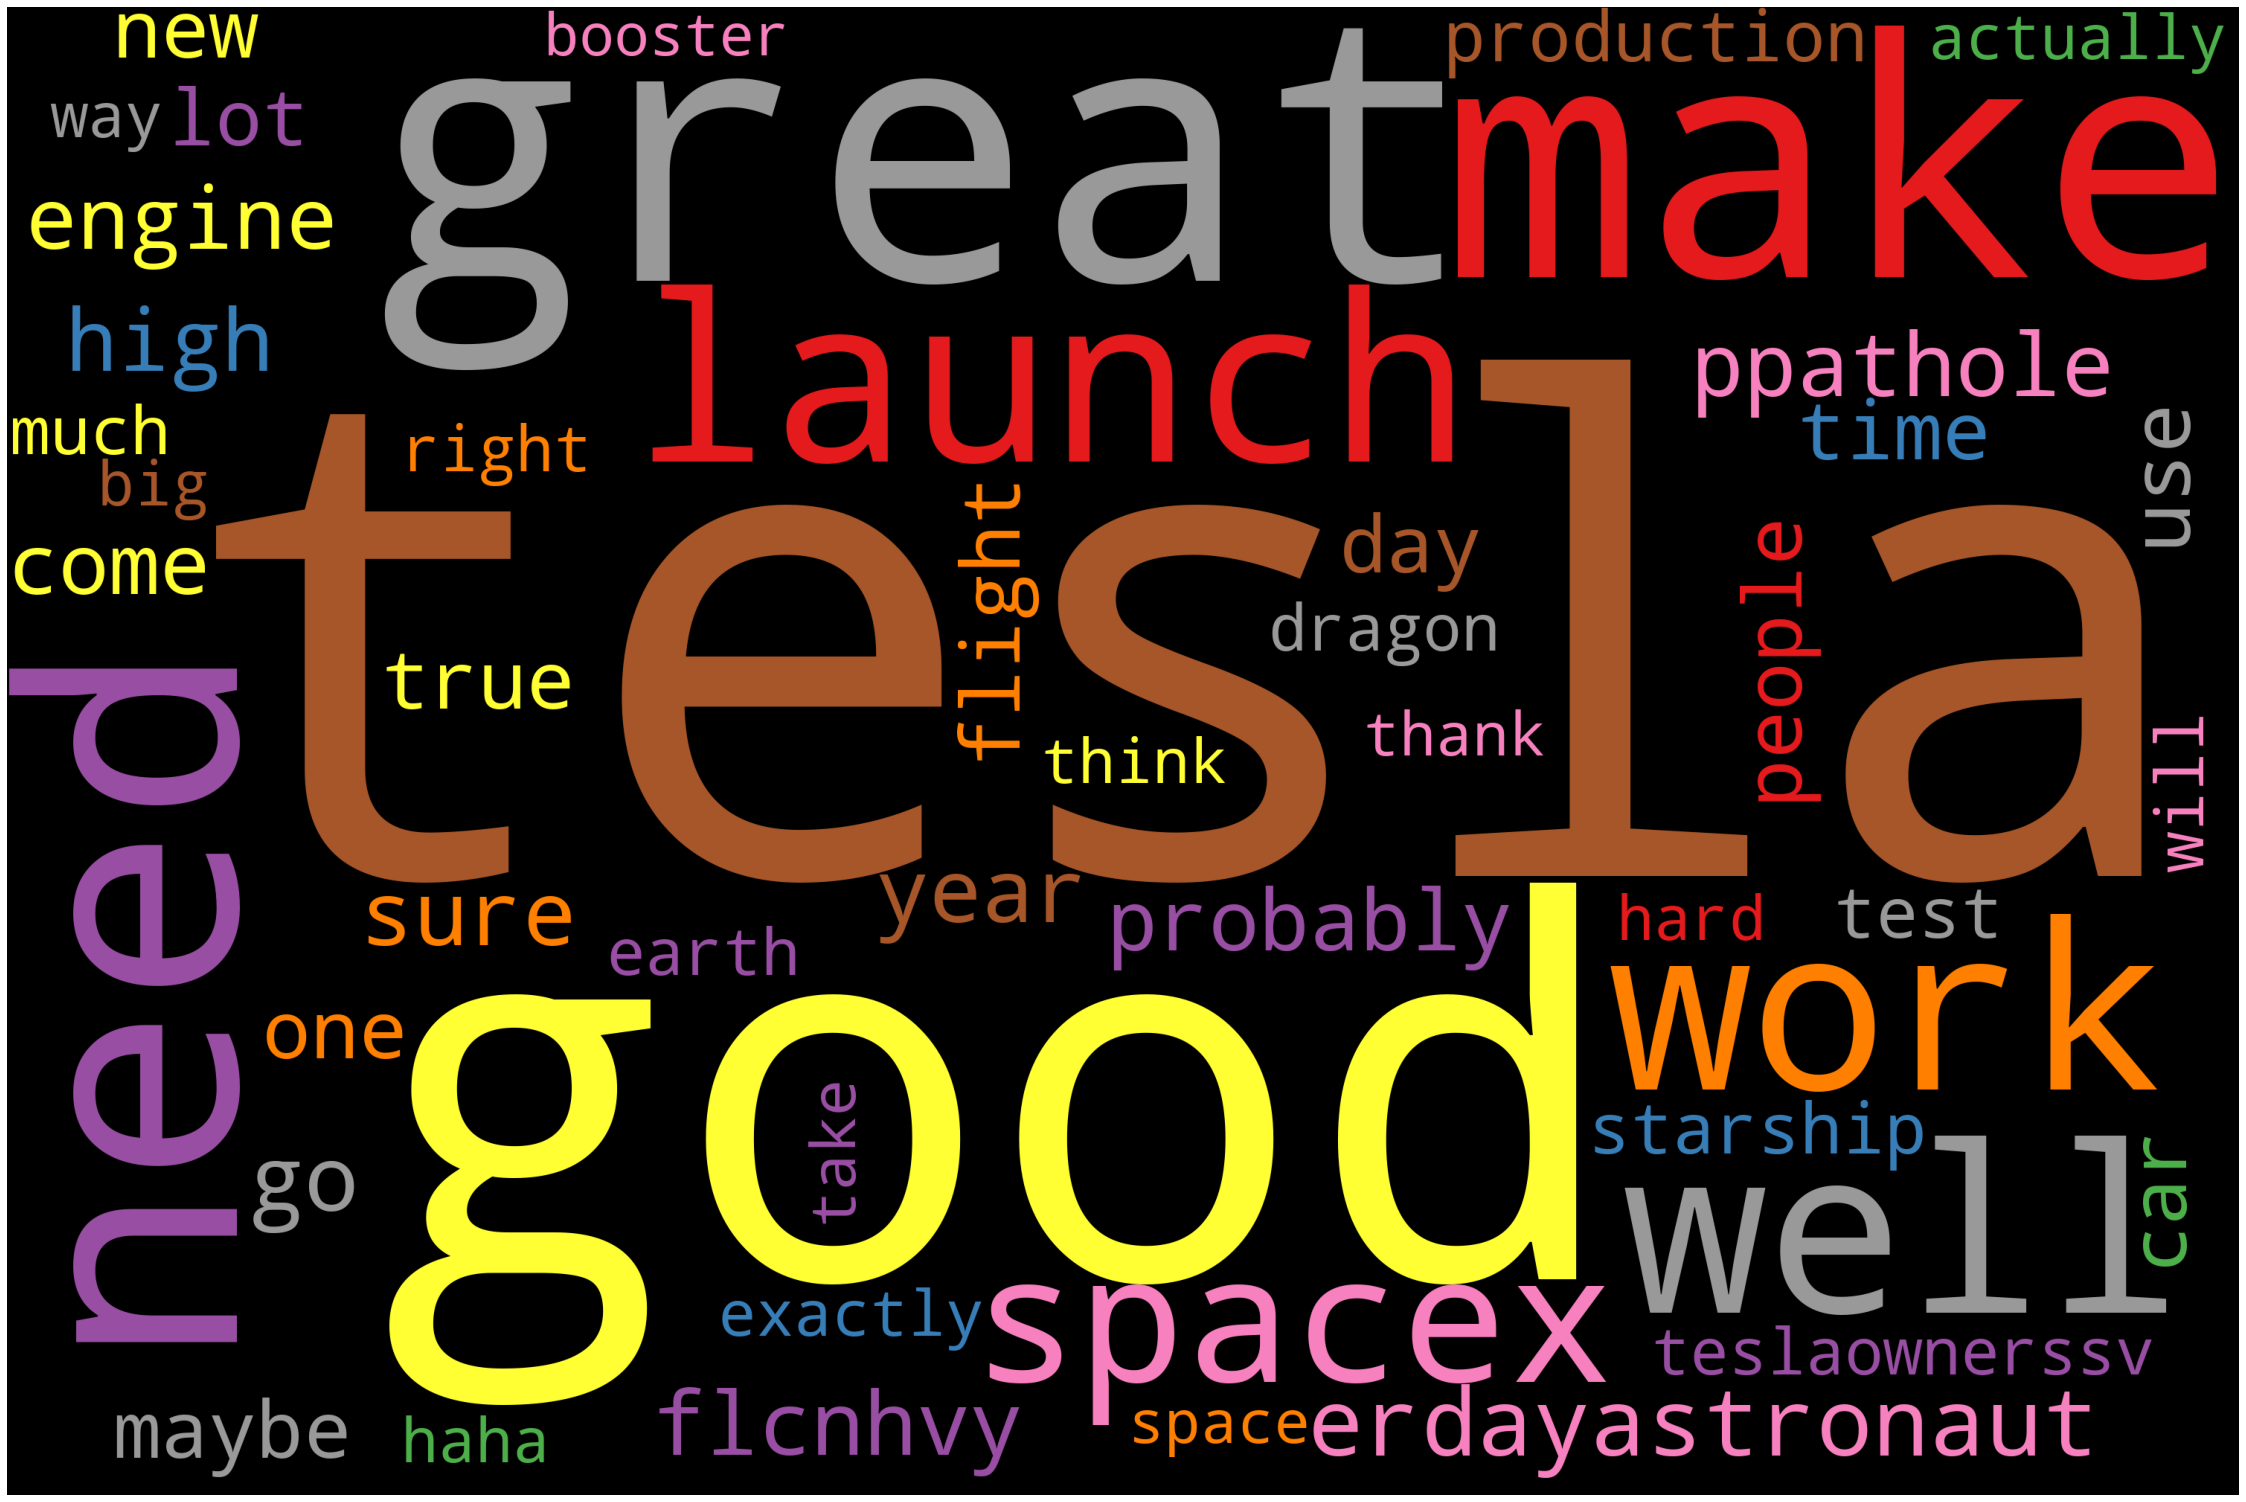

In [34]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [36]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [37]:
for token in doc_block[100:200]:
    print(token,token.pos_)

element ADJ
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
blkmdl3 NOUN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo PROPN
rationaletienne PROPN
starlink VERB
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex AUX
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g PROPN
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this DET
intend ADJ
earth NOUN
may AUX
idea NOUN
apply VERB
mars PROPN
cryptoshrikar PROPN
xprize NOUN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize PROPN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that SCONJ
missingback NOUN
work NOUN
go VERB
capybarasurfer NOUN
do AUX
seem VERB
bit ADV
hig

In [38]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])


['orbit', 'improve', 'ship', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'let', 'doge', 'rainforest', 'come', 'simplicity', 'genius', 'astrogdogg', 'jbuttermost', 'dogecoinrich', 'decade', 'work', 'look', 'note', 'email', 'text', 'yeslesson', 'learnedof', 'earth', 'marstime', 'tell', 'story', 'tesla', 'spacex', 'theonion', 'read', 'hear', 'name', 'year', 'grimezsz', 'dogecakeyolt', 'damian', 'kristennetten', 'owenspark', 'thing', 'restaurant', 'get', 'sjmthe', 'currency', 'earth', 'redlineshifter', 'destiny', 'erdayastronaut', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'galaxy', 'explore', 'unrt', 'falcon', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'flameout', 'risk', 'erdayastronaut', 'star

In [39]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,make,64
1,launch,58
2,work,48
3,year,47
4,need,45
5,go,39
6,get,38
7,tesla,37
8,come,36
9,day,36


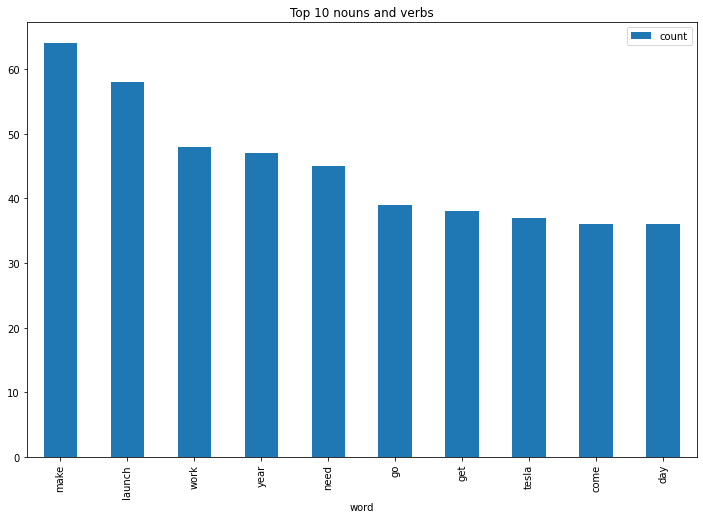

In [40]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [41]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [42]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...
